<a href="https://colab.research.google.com/github/Silpa12345/Deep_learning/blob/main/Task3_4_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import copy
import numpy as np
import torch
import torch.nn as nn

%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import models, transforms

# Visualizing Convolutional Neural Networks

Download a pretrained AlexNet model and plot the weights of the first convolutional layer

In [ ]:
# Download a pretrained AlexNet
alexnet = models.alexnet(pretrained=True).features
alexnet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 152MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## Filter Visualization

In filter visualization, we will extract the weights of the filters at first Conv2d layer of a pretrained AlexNet, and show them as images using `plt`.

_Hints_:
- See "[What is a `state_dict`?](https://pytorch.org/tutorials/beginner/saving_loading_models)" for accessing module weights.
- See [matplotlib subfigures](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) for creating image grids.

In [ ]:
# TODO: Extract weights of the first Conv2d layer
layer = alexnet[0]
w = layer.weight

# Convert weights Tensor to numpy and reshape
w = w.detach().numpy().transpose(0, 2, 3, 1)
print(w.shape)  # Should be (64, 11, 11, 3)

(64, 11, 11, 3)


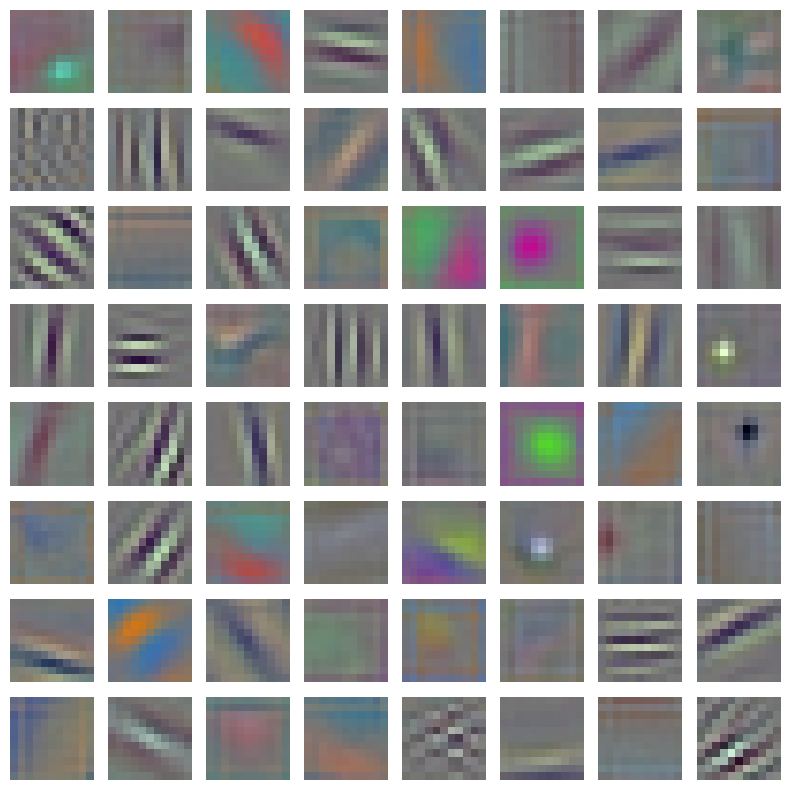

In [ ]:
# TODO: Show extracted weights as an 8x8 grid of images
# Hint: Normalize the weights in [0, 1] before plt.imshow
w_min = w.min()
w_max = w.max()
w_norm = (w - w_min) / (w_max - w_min)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    if i < w_norm.shape[0]:
        ax.imshow(w_norm[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

## Activation Map Visualization

In [ ]:
# Download a pretrained VGG16
vgg16 = models.vgg16(pretrained=True).features
vgg16

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 81.7MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [ ]:
conv_layers = []

# TODO: Append Conv2D layers in vgg16 to list

for layer in vgg16:
    if isinstance(layer, nn.Conv2d):
        conv_layers.append(layer)

print(len(conv_layers))

13


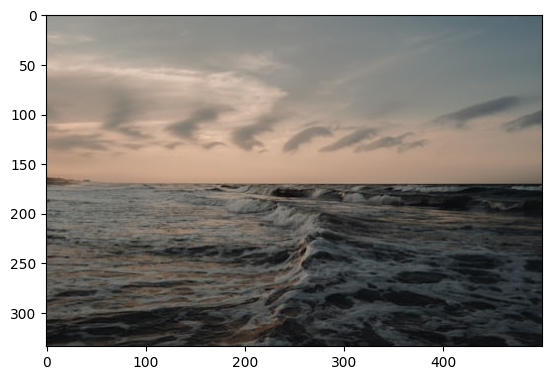

In [ ]:
# TODO: Download an image of your choice from the internet using the `wget` command
# command and open it as a numpy array using PIL.Image.
image_url = 'https://images.unsplash.com/photo-1733159775371-d70b9d6b1057?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxmZWF0dXJlZC1waG90b3MtZmVlZHwxNnx8fGVufDB8fHx8fA%3D%3D'
output_file = "/content/downloaded_image.jpg"

!wget -o output_file image_url
img = Image.open(output_file)

# TODO: Open the downloaded image using PIL.Image and convert to numpy array
im_arr = np.array(img)
plt.imshow(im_arr)

In [ ]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize((224, 224)),
                                transforms.ToTensor()])

im = transform(im_arr).unsqueeze_(0)
print(im.size())

torch.Size([1, 3, 224, 224])


In [ ]:
activations = []

# TODO: Forward pass 'im' through each of the conv_layers and save output in list


print(len(activations))  # Should be same as number of conv_layers

0


In [ ]:
# Visualize the activation maps
rows, columns = len(activations), 16
plt.figure(figsize=[columns, rows])
index = 1
for layer in range(rows):
  maps = activations[layer][0].data
  for i, act_map in enumerate(maps):
      if i >= columns:
        break

      plt.subplot(rows, columns, index)
      plt.imshow(act_map, cmap='gray')
      plt.axis('off')
      index += 1

plt.show()